In [2]:

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

import os

In [3]:
df = pd.read_csv("/content/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df.shape

(4600, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
#Dropping unnecessary columns
df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'street', 'statezip'], axis=1, inplace=True)

In [7]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,3.451739,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.677230,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,1.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,3.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,3.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,4.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,5.000000,2014.000000,2014.000000


In [8]:
df.duplicated().sum()

0

Text(0, 0.5, 'Density')

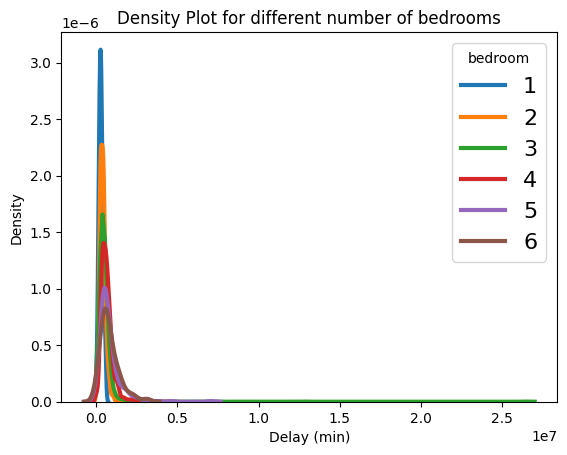

In [9]:
bed=[1,2,3,4,5,6]
# Iterate through the bedrooms
for i in bed:
    subset = df[df['bedrooms'] == i]

    # Draw the density plot
    sns.distplot(subset['price'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = i)

# Plot formatting
plt.legend(prop={'size': 16}, title = 'bedroom')
plt.title('Density Plot for different number of bedrooms')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

<Axes: xlabel='price', ylabel='sqft_lot'>

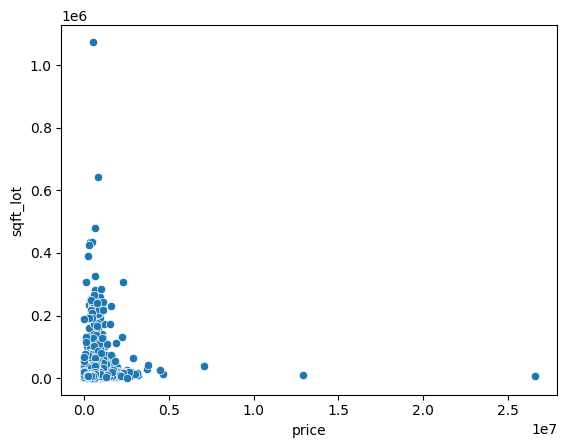

In [10]:
sns.scatterplot(data=df, x='price', y='sqft_lot')

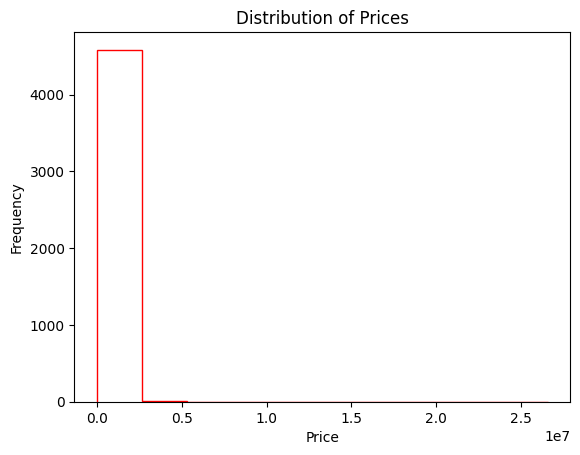

In [11]:
# Visualizing 'price'
plt.hist(df['price'], color='r', histtype='step')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Prices')
plt.show()

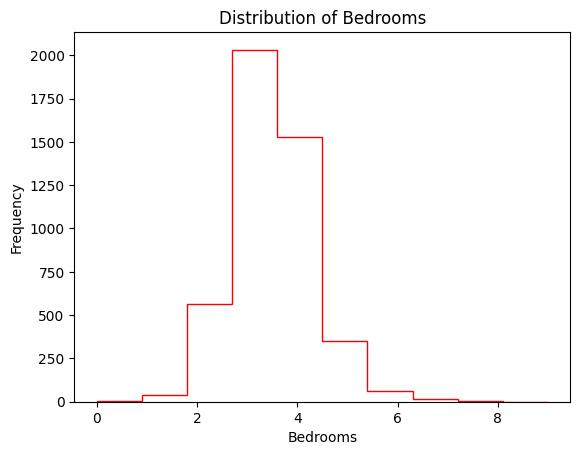

In [12]:
# Visualizing 'bedrooms'
plt.hist(df['bedrooms'], color='r', histtype='step')
plt.xlabel('Bedrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bedrooms')
plt.show()

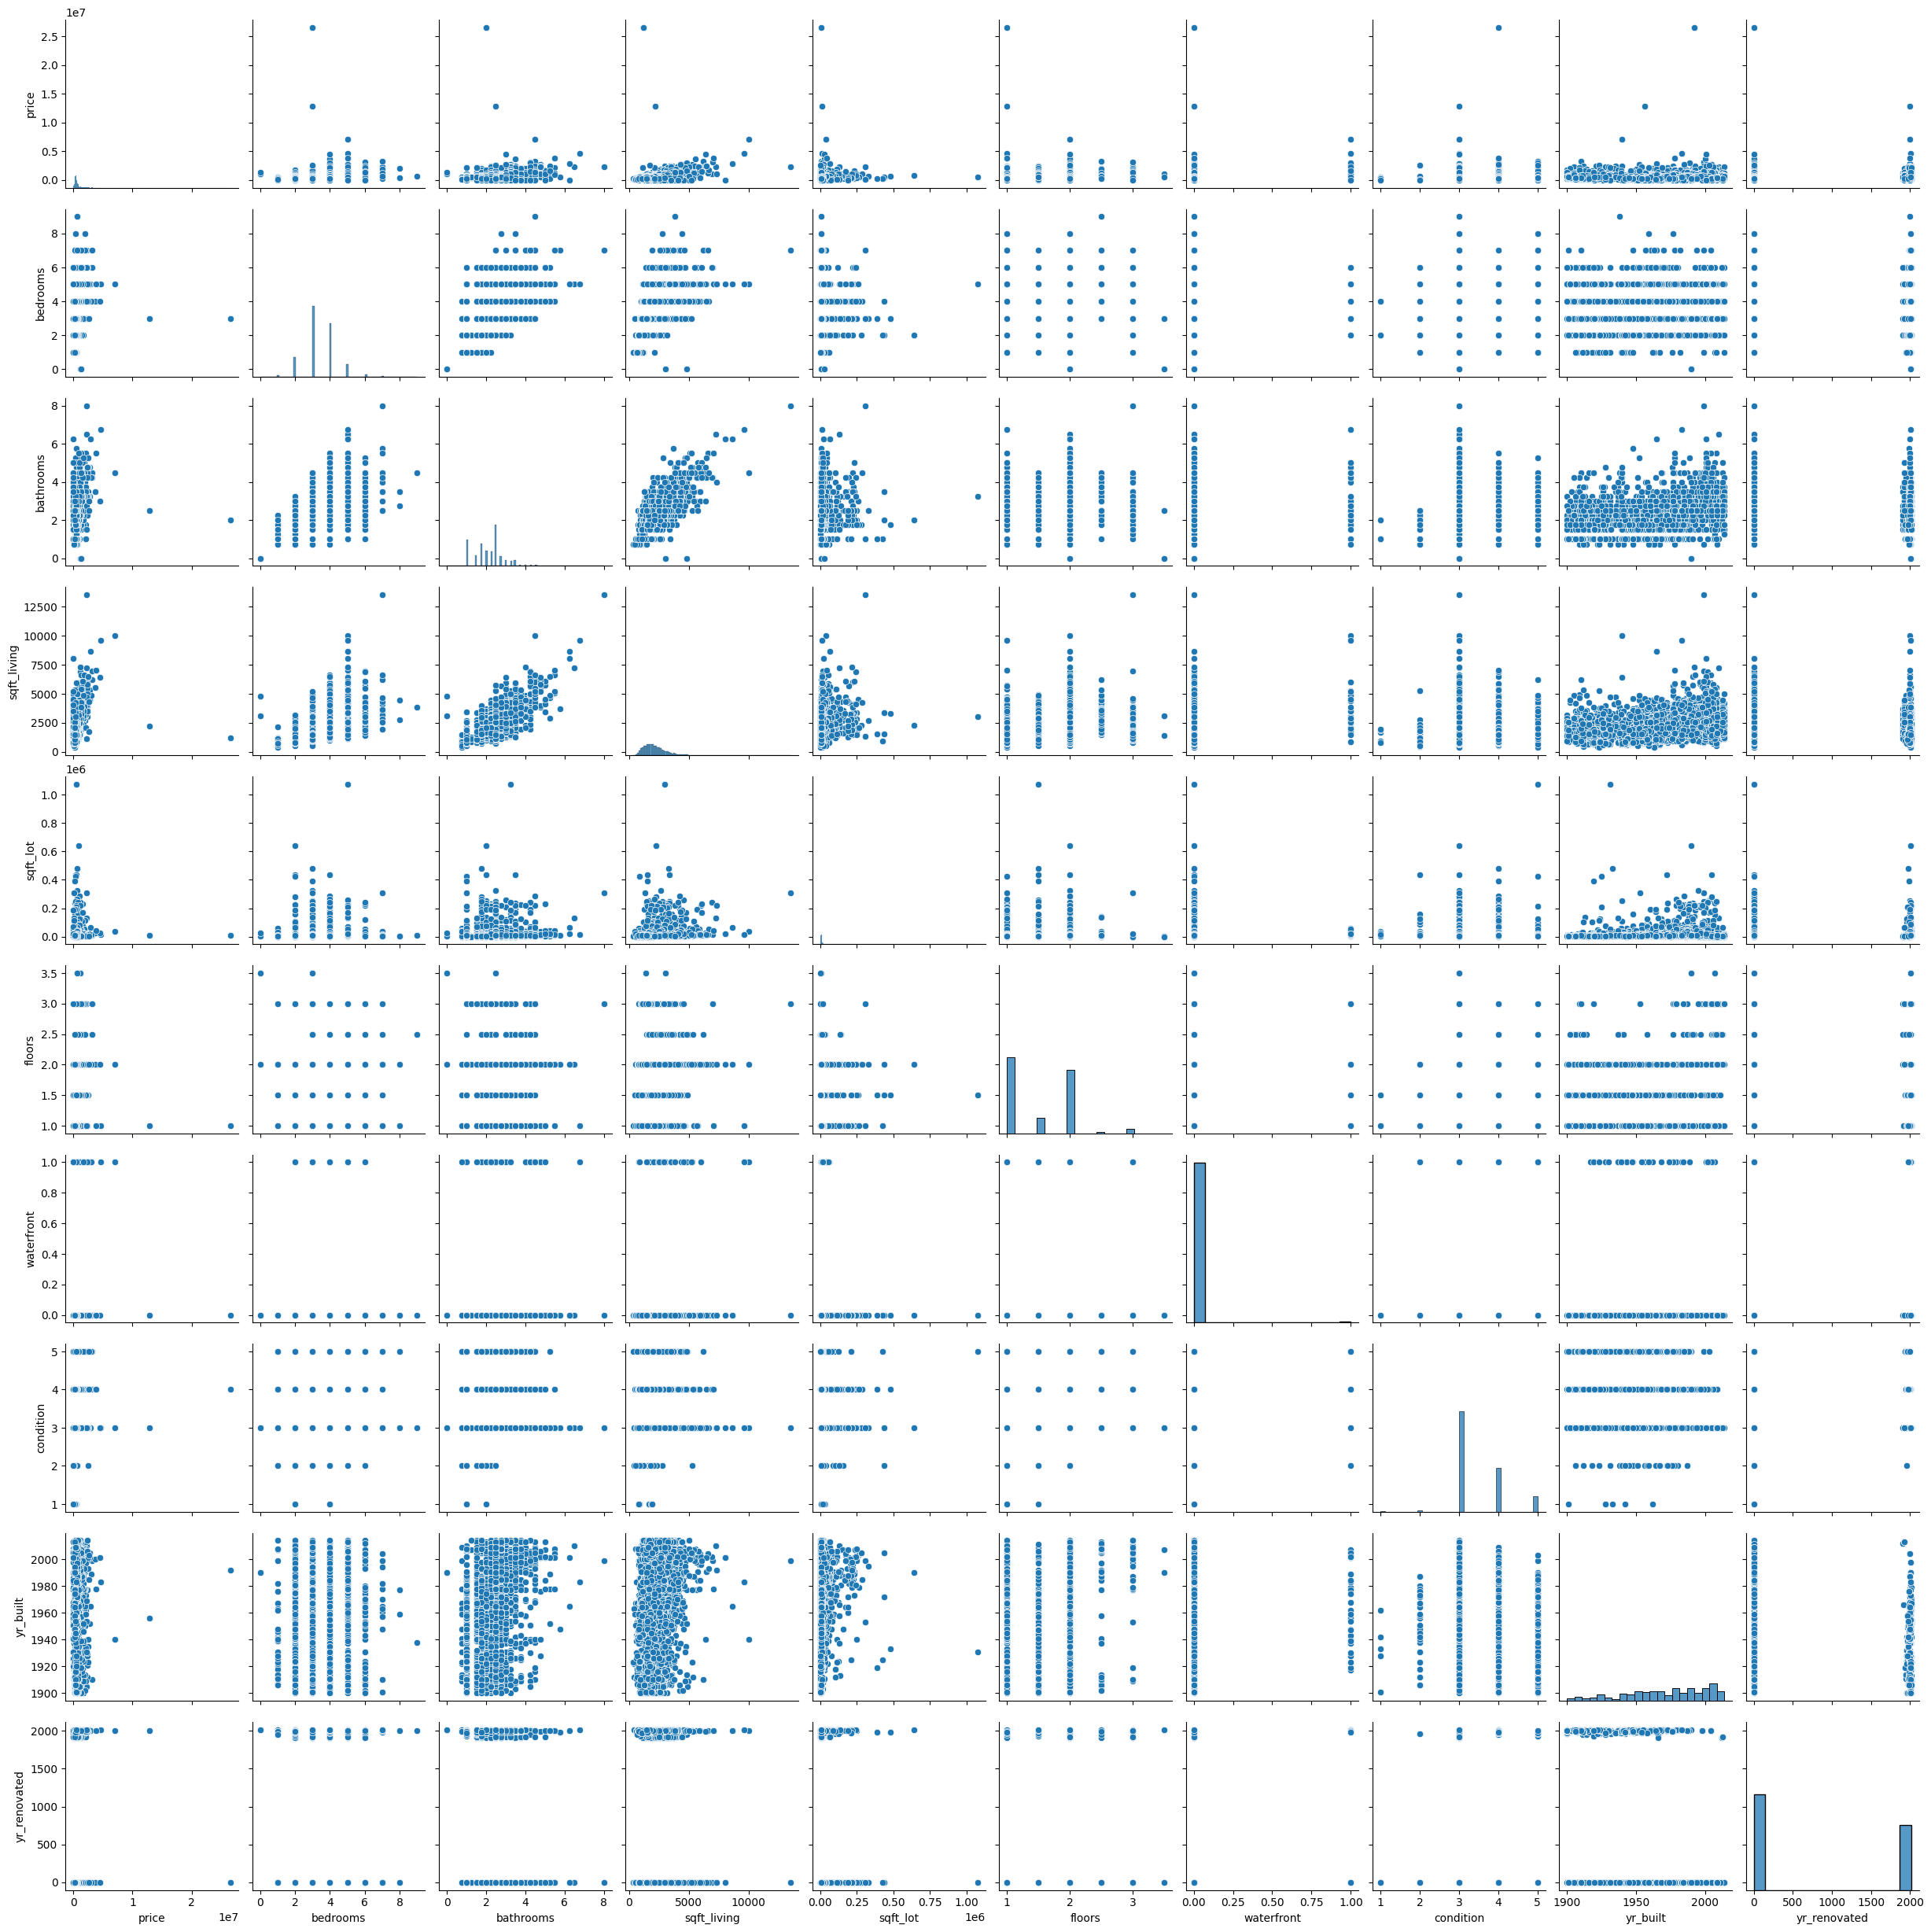

In [13]:
# Creating a pair plot
sns.pairplot(df)
plt.show()

In [14]:
# converting the text data into the numerical form
df['city']= pd.factorize(df['city'])[0]
df['country']= pd.factorize(df['country'])[0]

<Axes: >

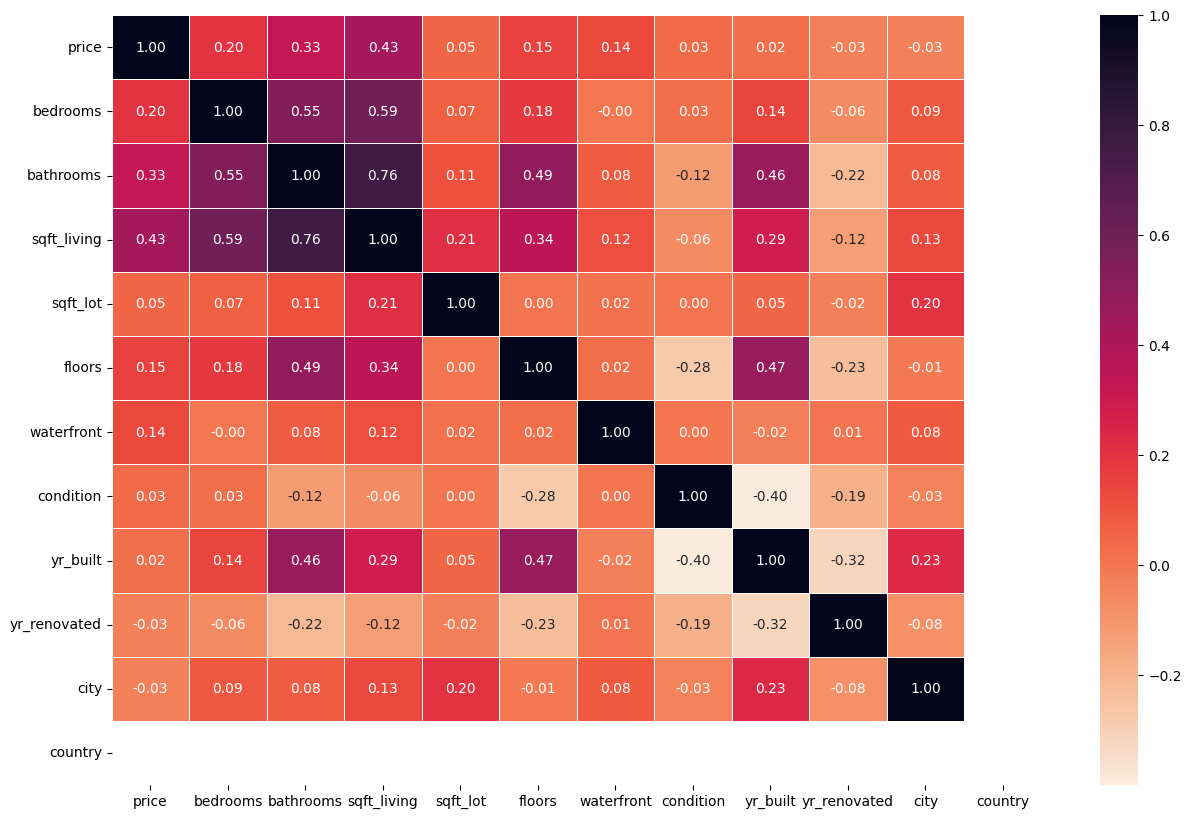

In [15]:
correl = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correl, annot=True, cmap='rocket_r', linewidths=0.5, fmt='.2f')

# Model Building

In [16]:
b = (df.columns)

In [17]:
#Scaling the features first
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[-0.42386353, -0.44112227, -0.84320364, ...,  1.22167046,
        -0.93285688,  0.        ],
       [ 3.2495981 ,  1.75970468,  0.43280154, ..., -0.82569345,
        -0.82370641,  0.        ],
       [-0.37242442, -0.44112227, -0.20520105, ..., -0.82569345,
        -0.71455593,  0.        ],
       ...,
       [-0.23956224, -0.44112227,  0.43280154, ..., -0.82569345,
         1.03185161,  0.        ],
       [-0.61826787,  0.6592912 , -0.20520105, ..., -0.82569345,
        -0.82370641,  0.        ],
       [-0.58775916, -0.44112227,  0.43280154, ..., -0.82569345,
         1.57760397,  0.        ]])

In [18]:
#Converting arrays into dataframe
df = pd.DataFrame(df,columns=b)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,yr_built,yr_renovated,city,country
0,-0.423864,-0.441122,-0.843204,-0.829971,-0.193434,-0.022416,-0.085004,-0.667112,-0.531014,1.221670,-0.932857,0.0
1,3.249598,1.759705,0.432802,1.568528,-0.161718,0.906555,-0.085004,2.286416,-1.674693,-0.825693,-0.823706,0.0
2,-0.372424,-0.441122,-0.205201,-0.217367,-0.080978,-0.951388,-0.085004,0.809652,-0.161000,-0.825693,-0.714556,0.0
3,-0.234071,-0.441122,0.113800,-0.144686,-0.190145,-0.951388,-0.085004,0.809652,-0.261913,-0.825693,-0.605405,0.0
4,-0.003482,0.659291,0.432802,-0.206984,-0.121306,-0.951388,-0.085004,0.809652,0.175376,1.208396,-0.496255,0.0


In [19]:
x = df.drop('price',axis=1)
y = df['price']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [23]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
mean_squared_error(y_pred,y_test)

3.0996199789861105

In [24]:
Score = r2_score(y_pred,y_test)
Score

-11.219943681586559

In [25]:
model.score(x_test,y_test)

0.03398717592732592

In [26]:
# Calculating the metrics
print("mse : ",mean_squared_error(y_test,y_pred))
print("rmse : ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("mae : ",mean_absolute_error(y_test,y_pred))
print("test r2score : ",r2_score(y_test,y_pred))

mse :  3.0996199789861105
rmse :  1.7605737641422783
mae :  0.3727794014033674
test r2score :  0.03398717592732592


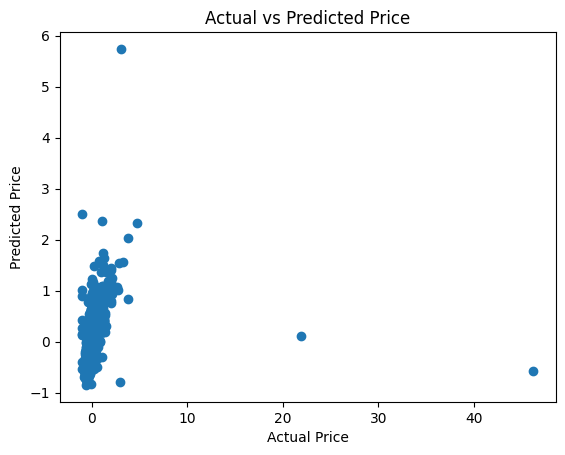

In [28]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()